# Klasifikasi Gambar

# Membuat dan Melatih Model untuk Memproses Dataset Gambar dari Dunia Nyata

In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
-O /tmp/Chessman-image-dataset.zip

--2021-06-17 10:26:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  7.56MB/s    in 7.7s    

2021-06-17 10:26:29 (7.52 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [2]:
import os
import zipfile

local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['King', 'Bishop', 'Pawn', 'Knight', 'Rook', 'Queen']

In [4]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


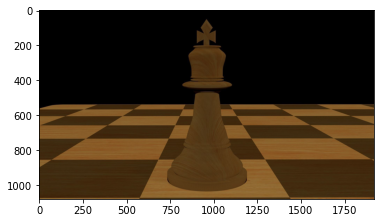

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1) # set validation split

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training' # set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2)

Epoch 1/50
63/63 - 40s - loss: 2.0943 - accuracy: 0.1743 - val_loss: 1.7878 - val_accuracy: 0.1923
Epoch 2/50
63/63 - 11s - loss: 1.7915 - accuracy: 0.2004 - val_loss: 1.7860 - val_accuracy: 0.2308
Epoch 3/50
63/63 - 11s - loss: 1.7822 - accuracy: 0.1804 - val_loss: 1.7806 - val_accuracy: 0.1923
Epoch 4/50
63/63 - 11s - loss: 1.7695 - accuracy: 0.2224 - val_loss: 1.7783 - val_accuracy: 0.1923
Epoch 5/50
63/63 - 11s - loss: 1.7578 - accuracy: 0.2345 - val_loss: 1.7835 - val_accuracy: 0.1731
Epoch 6/50
63/63 - 11s - loss: 1.7443 - accuracy: 0.2044 - val_loss: 1.7706 - val_accuracy: 0.2308
Epoch 7/50
63/63 - 11s - loss: 1.7243 - accuracy: 0.2605 - val_loss: 1.7468 - val_accuracy: 0.2692
Epoch 8/50
63/63 - 11s - loss: 1.6893 - accuracy: 0.2906 - val_loss: 1.7078 - val_accuracy: 0.3077
Epoch 9/50
63/63 - 11s - loss: 1.6666 - accuracy: 0.3166 - val_loss: 1.6923 - val_accuracy: 0.2692
Epoch 10/50
63/63 - 11s - loss: 1.5682 - accuracy: 0.3607 - val_loss: 1.6899 - val_accuracy: 0.3077
Epoch 11/

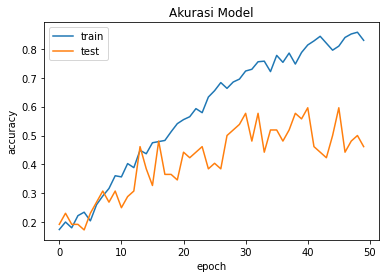

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

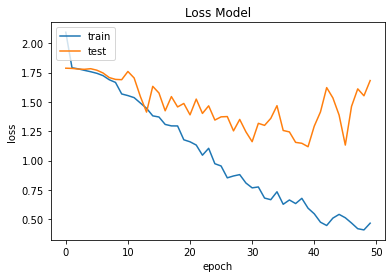

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()